<a href="https://colab.research.google.com/github/Jlok17/Data620/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 3: Graph Visualization:


#### Abstract: 

The Social Network data that I will be using is the Bitcoin Alpha network that was provided by the [Stanford.edu](https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html). As shown below the file that I am using unfiltered has 3782 Nodes and 24185 Edges. I will start this analysis by importing the different packages that are needed and then using pandas load the .csv file into a dataframe from my github repository. Some analysis that will be done on this revolves around 
the density of the graph, which measures the level of connectivity. Degree centrality in order to determine the importance of each node based on its degree. This will be done while I continue to filter the dataframe into the top 17 nodes with the highest degree centrality. A subgraph will be created using these nodes, and it will visualize different customized parameters.


In [22]:
# Packages that are needed:

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [23]:
# Loading CSV file from github via Pandas
url = 'https://raw.githubusercontent.com/Jlok17/Data620/main/DataSources/soc-sign-bitcoinalpha.csv'
BitcoinAl = pd.read_csv(url)
BitcoinAl.columns = ['SOURCE', 'TARGET', 'RATING', 'TIME']

In [24]:
# Checking Dataframe Structure to see if data was correctly loaded

BitcoinAl.info

<bound method DataFrame.info of        SOURCE  TARGET  RATING        TIME
0         430       1      10  1376539200
1        3134       1      10  1369713600
2        3026       1      10  1350014400
3        3010       1      10  1347854400
4         804       1      10  1337572800
...       ...     ...     ...         ...
24180    7604    7601      10  1364270400
24181    7601    7604      10  1364270400
24182    7604    7602      10  1364270400
24183    7602    7604      10  1364270400
24184    7604    7603     -10  1364270400

[24185 rows x 4 columns]>

In [25]:
# Create a directed graph from the DataFrame
DiGraph = nx.from_pandas_edgelist(BitcoinAl, 'SOURCE', 'TARGET', ['RATING', 'TIME'], create_using=nx.DiGraph())


# General Information
print("Number of nodes:", DiGraph.number_of_nodes())
print("Number of edges:", DiGraph.number_of_edges())


Number of nodes: 3782
Number of edges: 24185


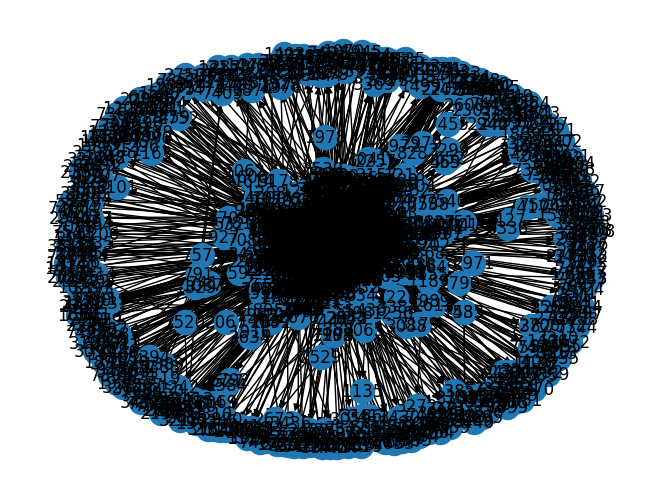

In [26]:
# Visualize Unfiltered graph
nx.draw(DiGraph, with_labels=True)
plt.show()


In [27]:
# Density of the Graph 
nx.density(DiGraph)

0.0016912892554285246

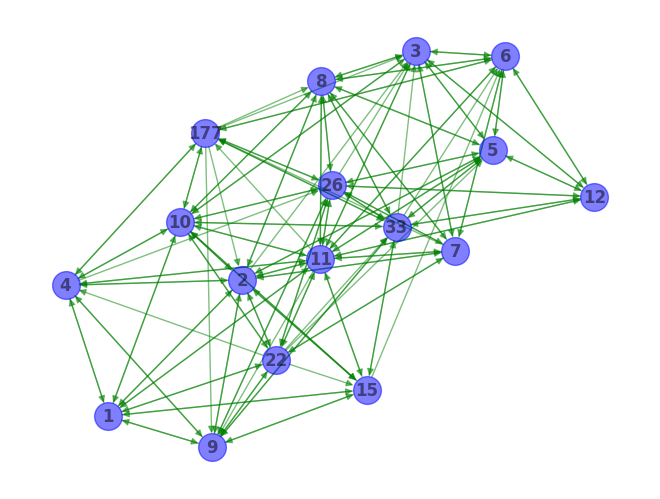

In [28]:
# Calculate the degree centrality of nodes
degree_centrality = nx.degree_centrality(DiGraph)

# Selecting top 17 nodes with the highest degree centrality
n = 17
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:n]

# Creating a subgraph 
subgraph = DiGraph.subgraph(top_nodes)
nx.draw(subgraph, with_labels=True,  node_color="blue", node_size=400, font_weight='bold', 
        edge_color="green", alpha=0.5)
plt.show()

In [38]:
# Subgraph Density 
nx.density(subgraph)

0.5551470588235294

In [37]:
# Calculating Clustering Coefficient of Nodes
nx.clustering(subgraph)

{1: 0.8333333333333334,
 2: 0.5361990950226244,
 3: 0.6678082191780822,
 4: 0.7411764705882353,
 5: 0.6484375,
 6: 0.6017699115044248,
 7: 0.6530612244897959,
 8: 0.6666666666666666,
 9: 0.5973451327433629,
 10: 0.5545454545454546,
 11: 0.5,
 12: 0.7666666666666667,
 33: 0.49079754601226994,
 15: 0.6588235294117647,
 177: 0.5826086956521739,
 22: 0.636986301369863,
 26: 0.5294117647058824}

The density of the Subgraph was 0.5551470588235294 while the density of the original is 0.0016912892554285246. This can be explained as we are taking the top nodes by degree centrality. Density is important to measure as allows us to understand the different relationships between the nodes as well as help identify the different clusters and communities while overarching allowing us to determine the performance of the overall network. Other values that were calculated is Clustering Coefficient of Nodes as this is important as for each node is calculated a value between 0 and 1. The value helps us see patterns of local connectivity and the overall cohesion of nodes. As the value is closer to 1 it shows that the nodes connected to node being evaluated are generally very interconnected with their neighbors. A big reason why this is important as it can help understand the network resilience as if a node is taken out there is still an effective chain of communication and relationships to keep the network highly functional.